<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2003%20-%20Morphology/Lecture_03_Morphology-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

In [90]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()



In [91]:
#Getting some samples
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip -O Images.zip
!unzip Images.zip

--2023-08-15 00:12:55--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip [following]
--2023-08-15 00:12:56--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2918590 (2.8M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>]   2.78M  --.-KB/s    in 0.09s  

#Mathematical Morphology

* Morphology (Nature): Branch of Biology that study the form and structure of animals and plants

* Morphology (Image Processing): Mathematical operations to extract image components based on pixel neighborhood.

* Increase/Decrease Objects Size, Reduce Noise, Close or Open (GAPS)




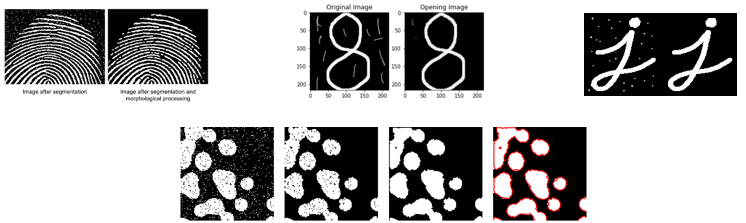

#Structuring Element (Kernel)

* Defines the shape of the structure to be applied
* The structure is slid through the image
* Erosion or Dilate operations are applied
* The origin determines the pixel be changed

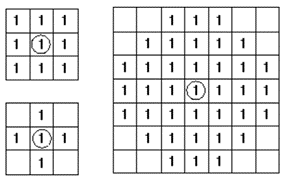

---



In [92]:
#defining structuring elements (kernels)

#3x3
k_quad = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]], dtype=np.uint8)

print(k_quad.shape)

#Cross
k_cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]], dtype=np.uint8)

print(k_cross.shape)

#ellipse
k_ellipse = np.array([[0,0,1,1,1,0,0],
                     [0,1,1,1,1,1,0],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [0,1,1,1,1,1,0],
                     [0,0,1,1,1,0,0]], dtype=np.uint8)

#ellipse
print(k_ellipse.shape)



(3, 3)
(3, 3)
(7, 7)


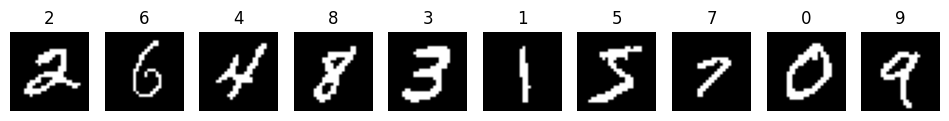

In [93]:
filelist = glob.glob('Images/*mnist*')

digits = []
labels = []
for path in filelist:
    dig = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    _,thresh = cv2.threshold(dig,127,255,cv2.THRESH_BINARY)
    digits.append(thresh)
    labels.append(path[-5])
plot_sidebyside(digits,labels,colormap='gray')

#Erosion (cv2.erode)
* Moves one´s to zero´s
* Binary ‘AND’ Operation
* Reduces Noises and Contours

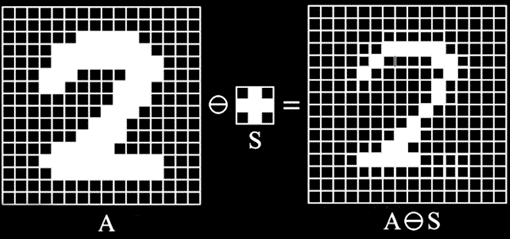


[[0 1 0]
 [1 1 1]
 [0 1 0]]


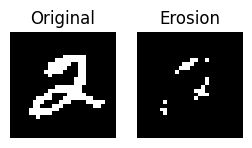

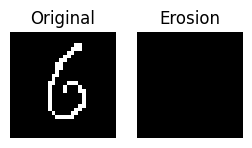

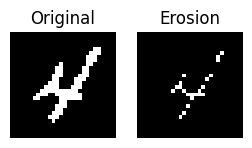

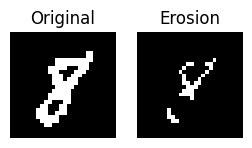

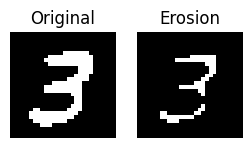

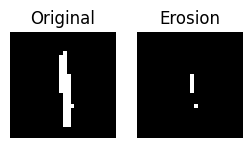

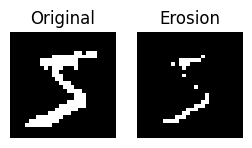

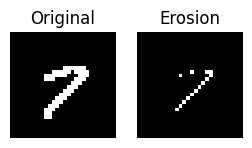

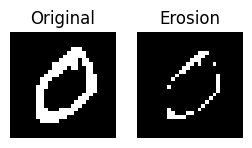

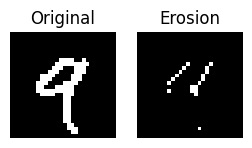

In [94]:
kernel = k_cross
print(kernel)
for img in digits:
    im_erode = cv2.erode(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Erosion'],colormap='gray',figsize=(3,2))

#Dilation
* Moves zero’s to one’s
* Binary ‘OR’ Operation (HIT)
* Increases Objects, connect contours and fill holes.

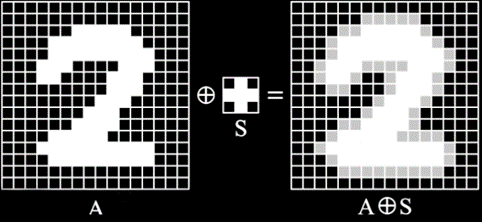

[[0 1 0]
 [1 1 1]
 [0 1 0]]


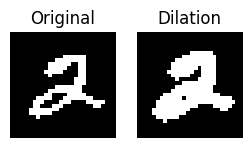

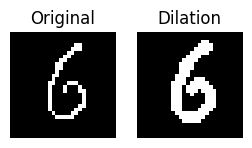

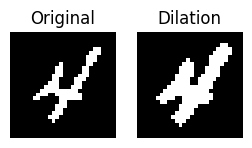

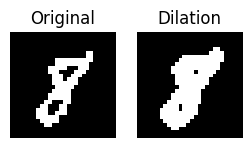

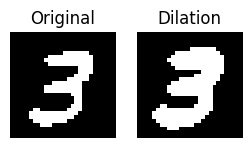

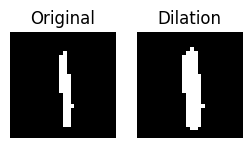

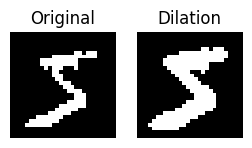

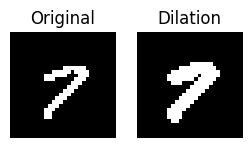

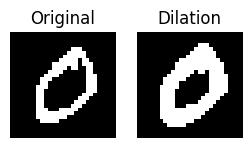

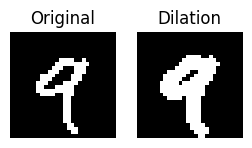

In [95]:
kernel = k_cross
print(kernel)
for img in digits:
    im_erode = cv2.dilate(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Dilation'],colormap='gray',figsize=(3,2))

#Combined Morphological Operations (Opening, Closing)

  Combined Morphological Operations preserve the shape and size o large objects in the image

* Opening: Erode + Dilate
  * Removes small objects, noises, and thin lines

* Closing: Dilate + Erode
  * Fill small holes and connect segmented contours


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


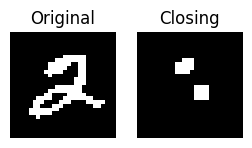

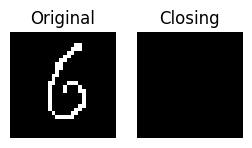

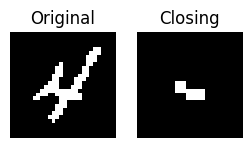

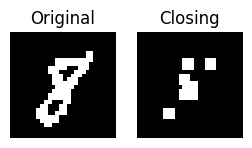

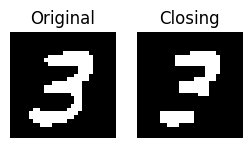

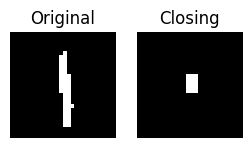

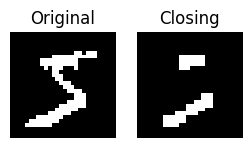

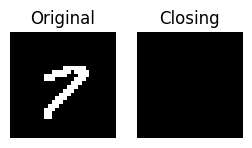

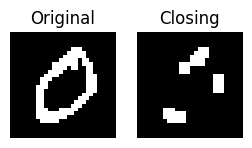

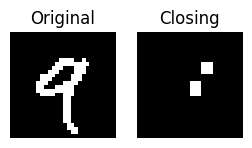

In [96]:
kernel = np.ones((3,3))
print(kernel)

def morf_closing(img,kernel):
    im_erode = cv2.erode(img,kernel)
    im_close = cv2.dilate(im_erode,kernel)
    return im_close

for img in digits:
    im_close = morf_closing(img,kernel)
    plot_sidebyside([img,im_close],['Original','Closing'],colormap='gray',figsize=(3,2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


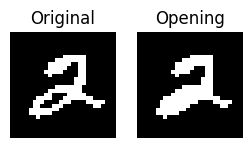

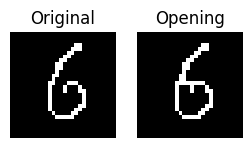

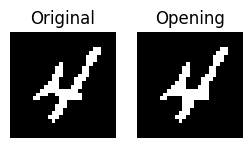

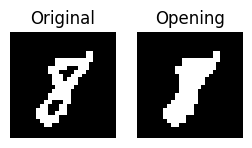

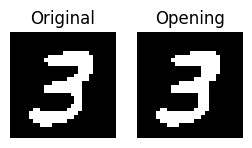

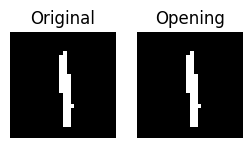

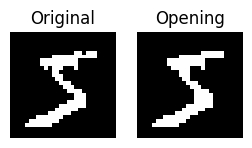

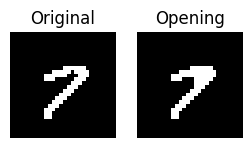

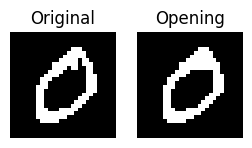

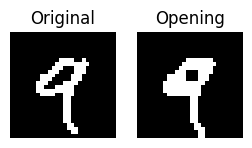

In [97]:
kernel = np.ones((3,3))
print(kernel)

def morf_opening(img,kernel):
    im_dilate = cv2.dilate(img,kernel)
    im_open = cv2.erode(im_dilate,kernel)
    return im_open

for img in digits:
    im_open = morf_opening(img,kernel)
    plot_sidebyside([img,im_open],['Original','Opening'],colormap='gray',figsize=(3,2))

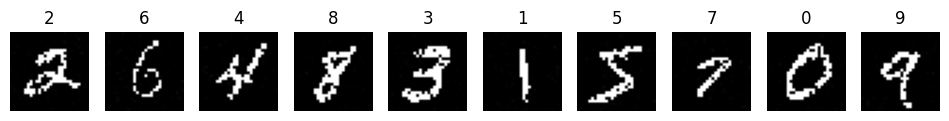

In [98]:
#Adding some noise
noisy_digits = []
for img in digits:
    im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
    mean = -5
    sigma = 5
    noisy = cv2.randn(im,mean,sigma) # create the random distribution
    noisy = img + noisy
    noisy_digits.append(noisy)
plot_sidebyside(noisy_digits,labels,colormap='gray')

[[1. 1.]
 [1. 1.]]


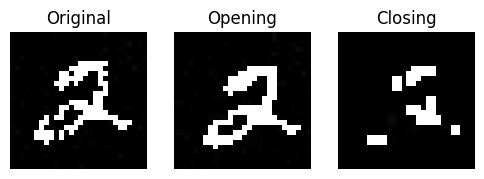

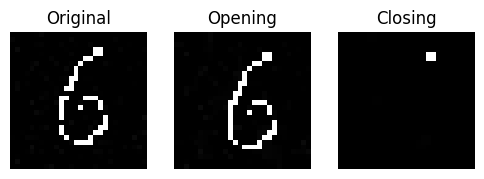

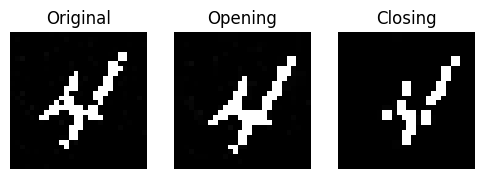

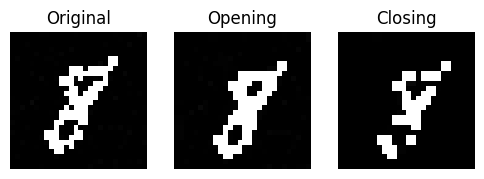

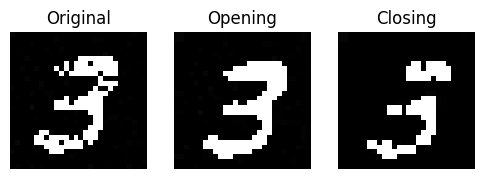

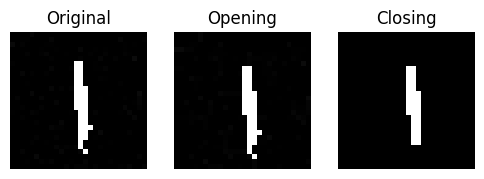

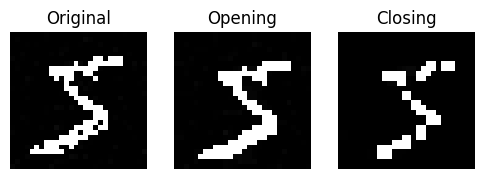

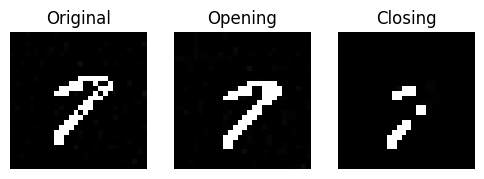

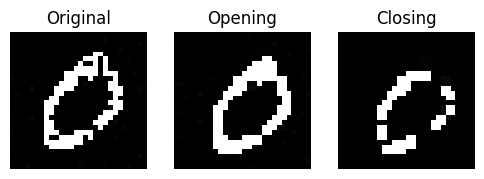

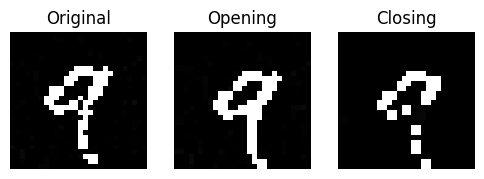

In [99]:
kernel = np.ones((2,2))
print(kernel)
for img in noisy_digits:
    im_open = morf_opening(img,kernel)
    im_close = morf_closing(img,kernel)
    plot_sidebyside([img,im_open,im_close],['Original','Opening','Closing'],colormap='gray',figsize=(6,4))

#Line Detector with Morphology (Guided Implementation)

The code below creates a image with three different lines (Horizontal, Vertical and Diagonal)

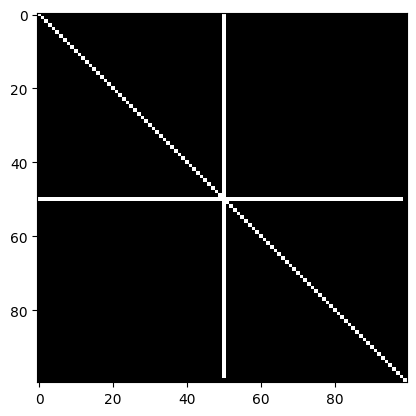

In [100]:
im = np.zeros((100,100))

for x in range(99):
    #vertical
    im[x][50] = 255

    #horizontal
    im[50][x] = 255


im = cv2.line(im,(0,0),(99,99),(255,255,255),thickness=1)

plt.imshow(im,cmap='gray')
plt.show()

* How to create structuring elements to remove the lines?
* Which morphological operations are suitable for this problem?


In [101]:
#implementation goes here


#.....

#Pratice 1 - Erosion and Dilation Implementation

Implement your own erode and dilate functions and compare them to cv2.erode() and cv2.dilate()


In [102]:
#implementation goes here


#.....

#Practice - Handwritten Segmentation

Try to segment the handwritten digits. At this point, don't worry about identifying the amount. You need only subtract the background as better you can.

Practice the skills learned in the past lessons:
   - Color Segmentation
   - Threshold
   - Filtering
   - Morphological Operators

#Solução A

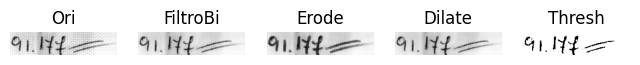

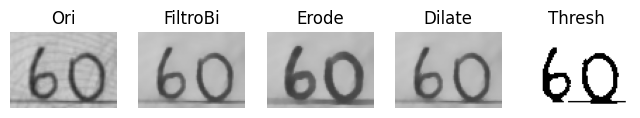

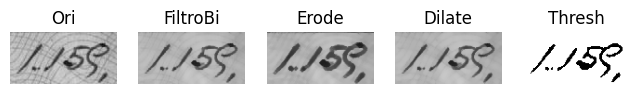

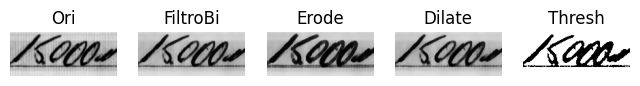

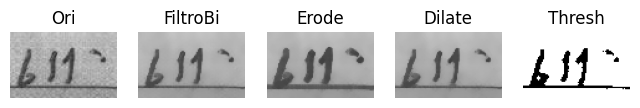

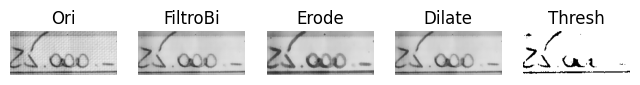

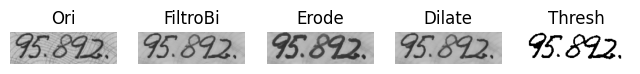

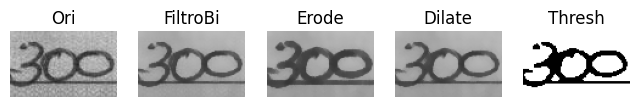

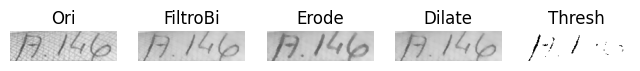

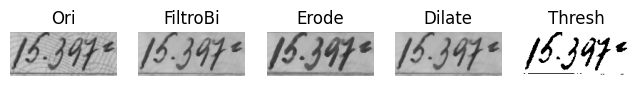

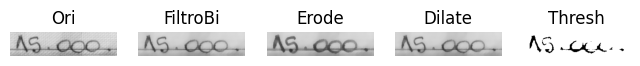

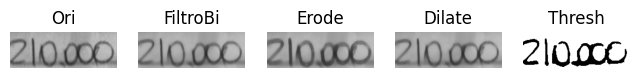

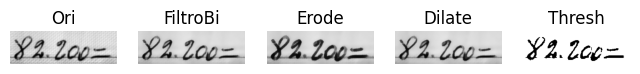

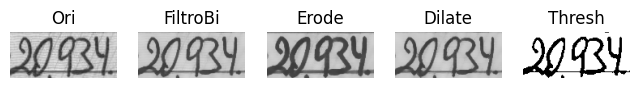

In [112]:
paths = glob.glob('Images/*car*')

kernel = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]],dtype=np.uint8)

#Luis
for path in paths:
  img = cv2.imread(path)

  #bilateral
  im1 = cv2.bilateralFilter(img,9,75,75)
  #close
  im2 = cv2.erode(im1,kernel)
  im3 = cv2.dilate(im2,kernel)
  #thresh 125
  _, im4 = cv2.threshold(im3,125,255,cv2.THRESH_BINARY)


  plot_sidebyside([img,im1,im2,im3,im4],['Ori','FiltroBi','Erode','Dilate','Thresh'],colormap='gray',figsize=(8,6))



#Solução B

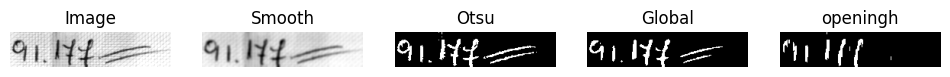

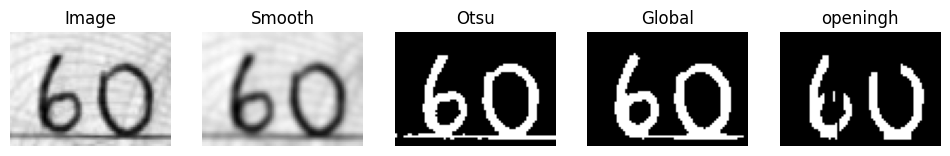

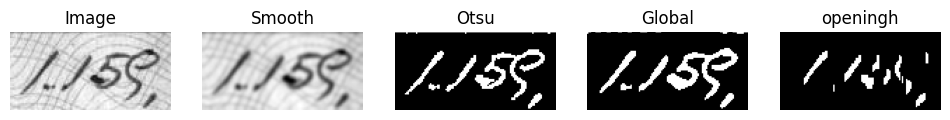

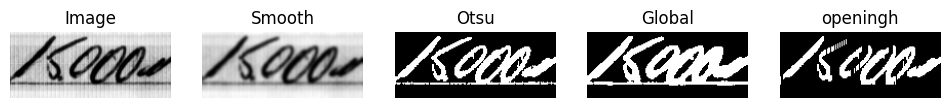

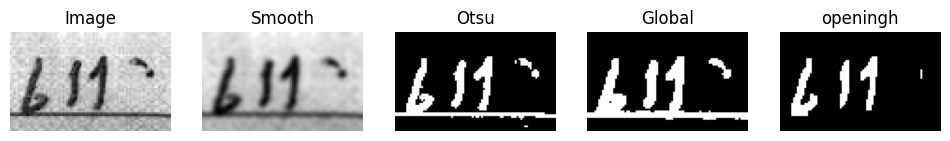

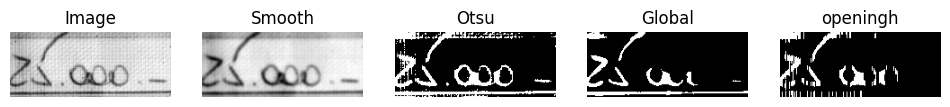

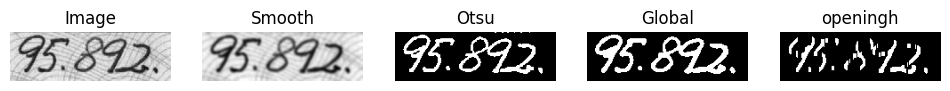

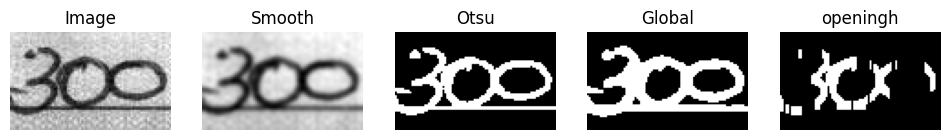

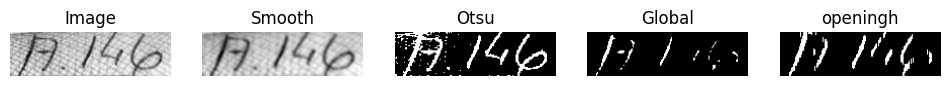

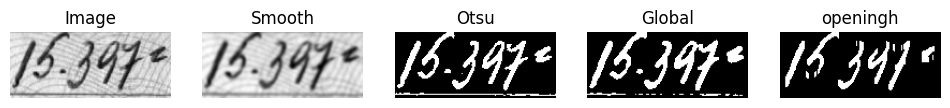

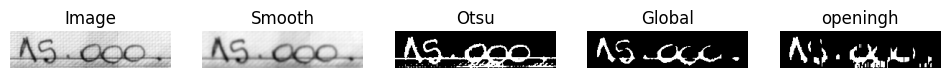

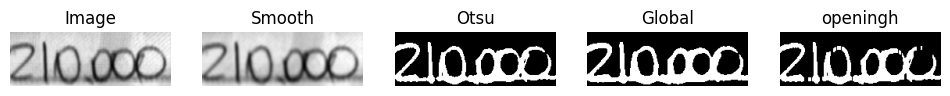

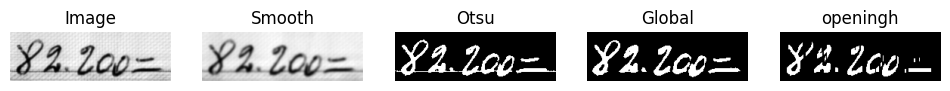

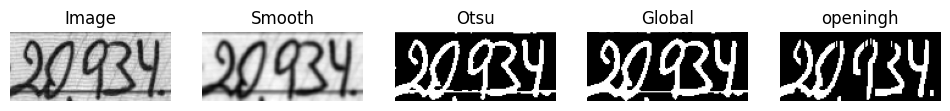

In [113]:
paths = glob.glob('Images/*car*')

for path in paths:
  im = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

  filter = cv2.GaussianBlur(im,(5,5),0)

  _,thresh = cv2.threshold(filter,140,255,cv2.THRESH_BINARY_INV)
  _,thresh_otsu = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  kernel = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0]],dtype=np.uint8)

  cross = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0]],dtype=np.uint8)

  openingv = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, cross, iterations=1)
  openingh = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, cross, iterations=2)

  plot_sidebyside([im,filter,thresh_otsu,thresh,openingh],
                  ['Image','Smooth','Otsu','Global','openingh'],colormap='gray',figsize=(12,4))




